In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.ensemble import RandomForestClassifier


In [13]:
df = pd.read_csv('pump_data.csv')
df.head()


,timestamp,asset_id,asset_type,location,vibration_rms_mm_s,temperature_c,pressure_bar,flow_m3h,differential_pressure_bar,valve_position_pct,ambient_temp_c,hours_since_maintenance,failure_in_next_7d,failure_within_days
0,2024-01-01 00:00:00,1,pump,Onshore,3.647689,77.615149,117.658466,196.487946,2.789606,2.058449,40.372043,14,0,0
1,2024-01-01 01:00:00,1,pump,Onshore,2.530526,72.712800,115.365823,193.014054,2.120981,43.194502,21.607038,14,0,0
2,2024-01-01 02:00:00,1,pump,Onshore,1.987169,71.571237,110.919759,178.815444,2.732824,19.967378,33.419566,14,0,0
3,2024-01-01 03:00:00,1,pump,Onshore,2.455617,70.554613,108.490064,205.635470,1.699681,68.423303,32.958144,14,0,0
4,2024-01-01 04:00:00,1,pump,Onshore,2.986503,64.711445,128.225449,181.687345,2.104432,54.671028,21.282309,14,0,0


In [14]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  28800 non-null  str    
 1   asset_id                   28800 non-null  int64  
 2   asset_type                 28800 non-null  str    
 3   location                   28800 non-null  str    
 4   vibration_rms_mm_s         28800 non-null  float64
 5   temperature_c              28800 non-null  float64
 6   pressure_bar               28800 non-null  float64
 7   flow_m3h                   28800 non-null  float64
 8   differential_pressure_bar  28800 non-null  float64
 9   valve_position_pct         28800 non-null  float64
 10  ambient_temp_c             28800 non-null  float64
 11  hours_since_maintenance    28800 non-null  int64  
 12  failure_in_next_7d         28800 non-null  int64  
 13  failure_within_days        28800 non-null  int64  
dtypes

,asset_id,vibration_rms_mm_s,temperature_c,pressure_bar,flow_m3h,differential_pressure_bar,valve_position_pct,ambient_temp_c,hours_since_maintenance,failure_in_next_7d,failure_within_days
count,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000
mean,10.500000,2.995975,70.008753,119.972797,200.013702,2.003420,50.054432,35.002520,104.300000,0.047917,0.169306
std,5.766381,1.000359,5.005822,10.028780,15.002491,0.499718,28.901628,7.015832,59.217664,0.213594,0.905870
min,1.000000,-0.879069,47.671981,82.919648,144.211970,0.091478,0.004812,7.204298,0.000000,0.000000,0.000000
25%,5.750000,2.320787,66.634376,113.134228,189.816916,1.668885,25.078230,30.283941,60.500000,0.000000,0.000000
50%,10.500000,2.992254,70.035513,119.911277,199.911044,2.000482,49.963521,35.023481,110.500000,0.000000,0.000000
75%,15.250000,3.658362,73.369481,126.737441,210.119776,2.340994,75.115984,39.696408,157.000000,0.000000,0.000000
max,20.000000,7.332210,88.726896,168.015146,268.431721,4.049725,99.991813,62.483664,188.000000,1.000000,7.000000


In [15]:
df['failure_in_next_7d'].value_counts()


failure_in_next_7d
0    27420
1     1380
Name: count, dtype: int64

In [16]:
features = [
    'vibration_rms_mm_s',
    'temperature_c',
    'pressure_bar',
    'flow_m3h',
    'differential_pressure_bar',
    'valve_position_pct',
    'ambient_temp_c',
    'hours_since_maintenance'
]

X = df[features]
y = df['failure_in_next_7d']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [20]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6855
           1       0.04      0.04      0.04       345

    accuracy                           0.91      7200
   macro avg       0.50      0.50      0.50      7200
weighted avg       0.91      0.91      0.91      7200

ROC-AUC Score: 0.5242723496020042


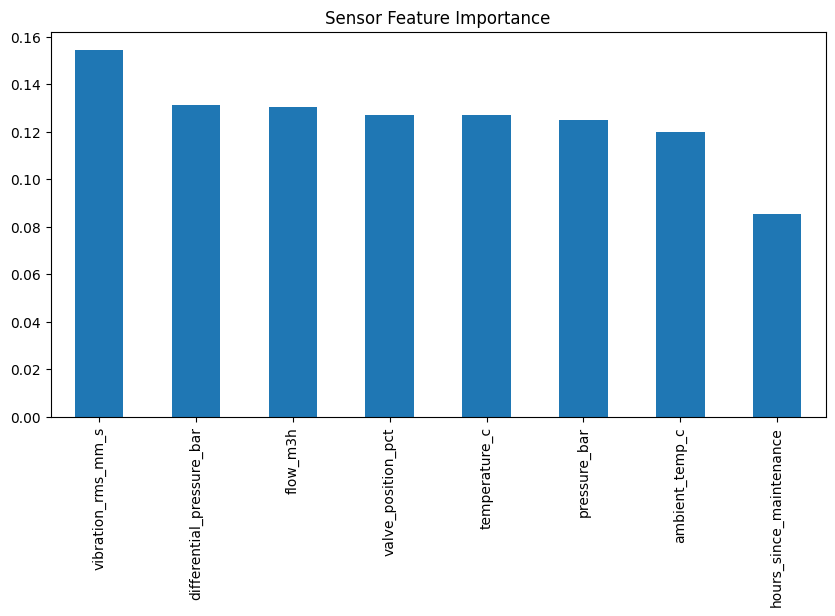

In [21]:
importances = pd.Series(
    model.feature_importances_, index=features
).sort_values(ascending=False)

importances.plot(kind='bar', figsize=(10,5))
plt.title("Sensor Feature Importance")
plt.show()


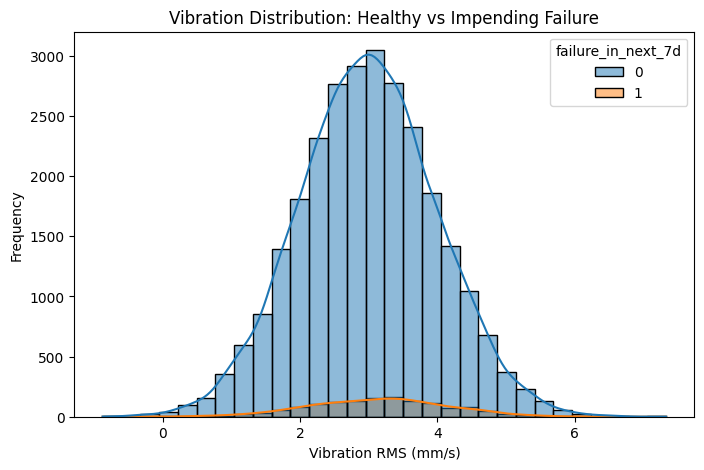

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='vibration_rms_mm_s',
    hue='failure_in_next_7d',
    bins=30,
    kde=True
)
plt.title("Vibration Distribution: Healthy vs Impending Failure")
plt.xlabel("Vibration RMS (mm/s)")
plt.ylabel("Frequency")
plt.show()


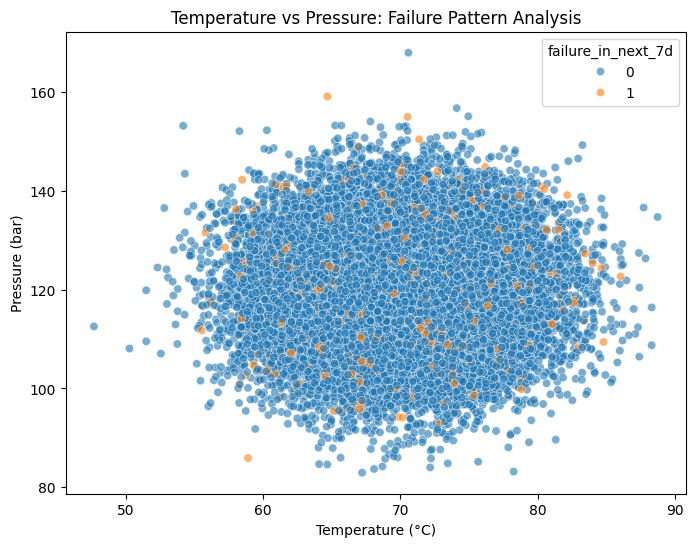

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='temperature_c',
    y='pressure_bar',
    hue='failure_in_next_7d',
    alpha=0.6
)
plt.title("Temperature vs Pressure: Failure Pattern Analysis")
plt.xlabel("Temperature (°C)")
plt.ylabel("Pressure (bar)")
plt.show()


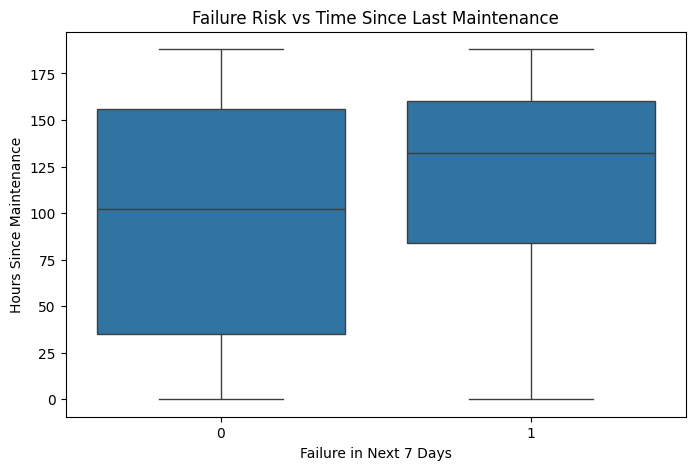

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='failure_in_next_7d',
    y='hours_since_maintenance'
)
plt.title("Failure Risk vs Time Since Last Maintenance")
plt.xlabel("Failure in Next 7 Days")
plt.ylabel("Hours Since Maintenance")
plt.show()
